In [303]:
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from scipy.io.arff import loadarff
from matplotlib import pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [278]:
path = "data/health+news+in+twitter/Health-Tweets/bbchealth.txt"
df_bbc = pd.read_csv(path, sep="|").iloc[:, -1]
print(type(df_bbc))
df_bbc_len = df_bbc.to_numpy().shape[0]
df_bbc, df_bbc_len

<class 'pandas.core.series.Series'>


(0       GP workload harming care - BMA poll http://bbc...
 1       Short people's 'heart risk greater' http://bbc...
 2       New approach against HIV 'promising' http://bb...
 3       Coalition 'undermined NHS' - doctors http://bb...
 4       Review of case against NHS manager http://bbc....
                               ...                        
 3923    Baby born after ovaries 'reawakened' http://bb...
 3924    Identical triplets born against odds http://bb...
 3925    Hospital failed to make improvements http://bb...
 3926    New patient targets pledge for NHS http://bbc....
 3927    C. diff 'manslaughter' inquiry call http://bbc...
 Name: Breast cancer risk test devised http://bbc.in/1CimpJF, Length: 3928, dtype: object,
 3928)

In [279]:
path = "data/health+news+in+twitter/Health-Tweets/cbchealth.txt"
df_cbc = pd.read_csv(path, sep="|", on_bad_lines='skip').iloc[:, -1]
print(type(df_cbc))
df_cbc_len = df_cbc.to_numpy().shape[0]
df_cbc, df_cbc_len

<class 'pandas.core.series.Series'>


(0       Sabra hummus recalled in U.S. http://www.cbc.c...
 1       U.S. sperm bank sued by Canadian couple didn't...
 2       Manitoba pharmacists want clampdown on Tylenol...
 3       Mom of 7 'spooked' by vaccinations reverses st...
 4       Hamilton police send mental health pros to the...
                               ...                        
 3722    Rural doctors mentor medical students in U of ...
 3723    More men suffering from eating disorders, says...
 3724    5 sources of objective drug information sugges...
 3725    Top five ways to avoid allergies this spring h...
 3726    Health Canada to stop sales of small magnets h...
 Name: Drugs need careful monitoring for expiry dates, pharmacists say http://www.cbc.ca/news/health/drugs-need-careful-monitoring-for-expiry-dates-pharmacists-say-1.3026749?cmp=rss, Length: 3727, dtype: object,
 3727)

In [280]:
path = "data/health+news+in+twitter/Health-Tweets/cnnhealth.txt"
df_cnn = pd.read_csv(path, sep="|", on_bad_lines='skip').iloc[:, -1]
print(type(df_cnn))
df_cnn_len = df_cnn.to_numpy().shape[0]
df_cnn, df_cnn_len

<class 'pandas.core.series.Series'>


(0       A plant-based diet that incorporates fish may ...
 1       It doesn't take much to damage your hearing at...
 2       RT @CNN: Forever young? Discover this island’s...
 3       RT @CNN: Is post-traumatic stress disorder in ...
 4       Maysoon Zayid, a touring standup comic with Ce...
                               ...                        
 4039    RT @EverydayHealth: Want killer abs? @JillianM...
 4040    Medicare at stake -- @sanjayguptaCNN talks abo...
 4041    Ann Romney talks about her experience with MS ...
 4042    Make sure your first marathon isn't your last!...
 4043    Robin Roberts' cancer diagnosis http://at.cnn....
 Name: An abundance of online info can turn us into e-hypochondriacs. Or, worse, lead us to neglect getting the care we need http://cnn.it/1L1t1Fv, Length: 4044, dtype: object,
 4044)

In [281]:
df_total = pd.concat([df_bbc, df_cbc, df_cnn])
df_total

0       GP workload harming care - BMA poll http://bbc...
1       Short people's 'heart risk greater' http://bbc...
2       New approach against HIV 'promising' http://bb...
3       Coalition 'undermined NHS' - doctors http://bb...
4       Review of case against NHS manager http://bbc....
                              ...                        
4039    RT @EverydayHealth: Want killer abs? @JillianM...
4040    Medicare at stake -- @sanjayguptaCNN talks abo...
4041    Ann Romney talks about her experience with MS ...
4042    Make sure your first marathon isn't your last!...
4043    Robin Roberts' cancer diagnosis http://at.cnn....
Length: 11699, dtype: object

In [282]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(df_total).toarray()
y = np.array((["bbc"] * df_bbc_len + ["cbc"] * df_cbc_len + ["cnn"] * df_cnn_len))
X, y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['bbc', 'bbc', 'bbc', ..., 'cnn', 'cnn', 'cnn'], dtype='<U3'))

In [283]:
pca = sk.decomposition.PCA(n_components=2)
res = pca.fit_transform(X)
res

array([[-0.09856335, -0.04504885],
       [-0.10547554, -0.05194276],
       [-0.10169242, -0.04403214],
       ...,
       [ 0.12759335, -0.06157649],
       [ 0.16748941, -0.097925  ],
       [ 0.12840512, -0.08960502]])

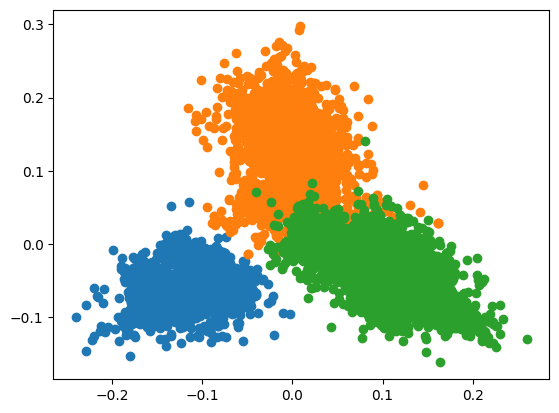

In [284]:
bbc = res[0:df_bbc_len, :]

cbc = res[df_bbc_len: df_bbc_len + df_cbc_len, :]

cnn = res[df_bbc_len + df_cbc_len:, :]

plt.scatter(bbc[:, 0], bbc[:, 1])
plt.scatter(cbc[:, 0], cbc[:, 1])
plt.scatter(cnn[:, 0], cnn[:, 1])

In [285]:
train, test, _, test_y_label = train_test_split(X, y, test_size=0.1, shuffle=True)
train.shape, test.shape

((10529, 23782), (1170, 23782))

In [286]:
model = sk.cluster.KMeans(n_clusters=3)
model.fit(train)

KMeans(n_clusters=3)

In [287]:
res = model.predict(test)
res

array([0, 0, 1, ..., 1, 0, 0])

In [288]:
centers = model.cluster_centers_
centers

array([[-1.49077799e-19,  1.19809267e-03,  6.70233653e-05, ...,
         6.83329682e-05,  4.00472048e-05,  7.45388994e-20],
       [ 1.18590189e-04,  2.05131825e-03,  9.48676901e-20, ...,
        -5.42101086e-20, -7.79270311e-20,  6.77626358e-20],
       [-6.77626358e-20,  2.64078289e-03, -1.35525272e-20, ...,
        -4.06575815e-20,  0.00000000e+00,  2.03960324e-04]])

In [289]:
reduc_cen = pca.transform(centers)
reduc_cen

array([[ 0.07450384, -0.01243827],
       [-0.10978912, -0.05440506],
       [-0.00081174,  0.14954378]])

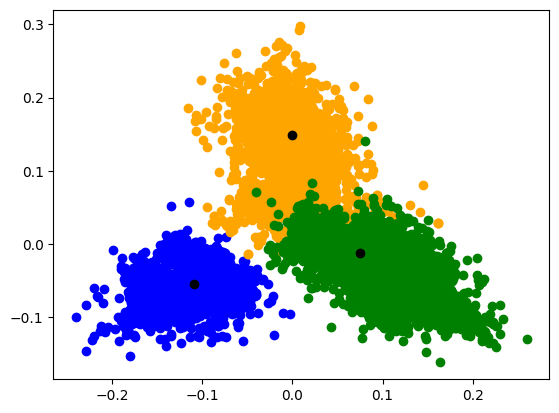

In [290]:
plt.scatter(bbc[:, 0], bbc[:, 1], c="blue")
plt.scatter(cbc[:, 0], cbc[:, 1], c="orange")
plt.scatter(cnn[:, 0], cnn[:, 1], c="green")
plt.scatter(reduc_cen[0, 0], reduc_cen[0, 1], c="black")
plt.scatter(reduc_cen[1, 0], reduc_cen[1, 1], c="black")
plt.scatter(reduc_cen[2, 0], reduc_cen[2, 1], c="black")

In [291]:
bbc_arr, cbc_arr, cnn_arr = X[0:df_bbc_len, :], X[df_bbc_len: df_bbc_len + df_cbc_len, :], X[df_bbc_len + df_cbc_len:, :]
bbc_arr, cbc_arr, cnn_arr

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [292]:
bbc_mean, cbc_mean, cnn_mean = bbc_arr.mean(axis=0).reshape(1, -1), cbc_arr.mean(axis=0).reshape(1, -1), cnn_arr.mean(axis=0).reshape(1, -1)
print(bbc_mean.shape)
bbc_mean, cbc_mean, cnn_mean

(1, 23782)


(array([[0.00010651, 0.00187275, 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.00000000e+00, 2.23100679e-03, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 9.47290906e-05]]),
 array([[0.00000000e+00, 1.31968309e-03, 8.73425161e-05, ...,
         8.90491450e-05, 5.21881230e-05, 0.00000000e+00]]))

In [293]:
bbc_mean_reduc = pca.transform(bbc_mean)
cbc_mean_reduc = pca.transform(cbc_mean)
cnn_mean_reduc = pca.transform(cnn_mean)
bbc_mean_reduc, cbc_mean_reduc, cnn_mean_reduc

(array([[-0.109998  , -0.05458728]]),
 array([[0.00050314, 0.10462474]]),
 array([[ 0.10637906, -0.04340198]]))

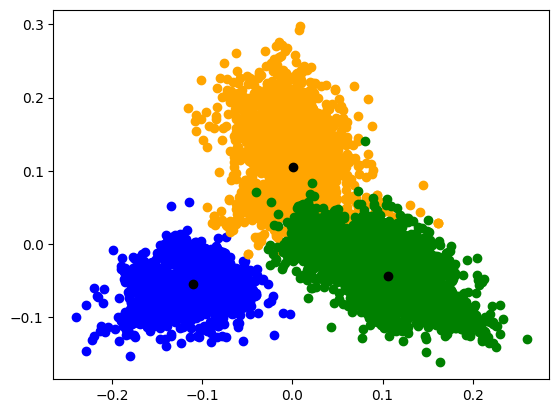

In [294]:
reduc_means = [bbc_mean_reduc, cbc_mean_reduc, cnn_mean_reduc]
plt.scatter(bbc[:, 0], bbc[:, 1], c="blue")
plt.scatter(cbc[:, 0], cbc[:, 1], c="orange")
plt.scatter(cnn[:, 0], cnn[:, 1], c="green")
plt.scatter(bbc_mean_reduc[0,0], bbc_mean_reduc[0,1], c="black")
plt.scatter(cbc_mean_reduc[0,0], cbc_mean_reduc[0,1], c="black")
plt.scatter(cnn_mean_reduc[0,0], cnn_mean_reduc[0,1], c="black")

In [295]:

def match_closest_cluster(actual_means, predicted_means, names, labels):
    n = len(actual_means)
    mapping = {

    }
    for i in range(n):
        mn = 1000000000
        index = -1
        for j in range(n):
            dist = np.linalg.norm(actual_means[i].flatten() - predicted_means[j])
            print(dist)
            if dist < mn:
                mn = dist
                index = j
        mapping[names[i]] = labels[index]

    return mapping

pred = model.predict(model.cluster_centers_)
pred

array([0, 1, 2])

In [296]:
mapping = match_closest_cluster(reduc_means, reduc_cen, ["bbc", "cbc", "cnn"], pred)
mapping

0.18925503409248537
0.00027719224462031754
0.23149757100645282
0.13849134568386826
0.19353257961018946
0.04493827307181141
0.04443850581206085
0.21644802834887303
0.22072138934163463


{'bbc': 1, 'cbc': 2, 'cnn': 0}

Text(0.07450384310181131, -0.012438268238654616, 'cnn')

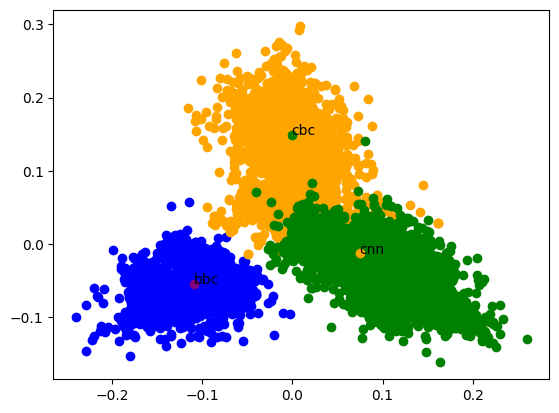

In [297]:
plt.scatter(bbc[:, 0], bbc[:, 1], c="blue")
plt.scatter(cbc[:, 0], cbc[:, 1], c="orange")
plt.scatter(cnn[:, 0], cnn[:, 1], c="green")
plt.scatter(reduc_cen[mapping['bbc'], 0], reduc_cen[mapping['bbc'], 1], c="purple")
plt.scatter(reduc_cen[mapping['cbc'], 0], reduc_cen[mapping['cbc'], 1], c="green")
plt.scatter(reduc_cen[mapping['cnn'], 0], reduc_cen[mapping['cnn'], 1], c="orange")
plt.annotate("bbc", (reduc_cen[mapping['bbc'], 0], reduc_cen[mapping['bbc'], 1]))
plt.annotate("cbc", (reduc_cen[mapping['cbc'], 0], reduc_cen[mapping['cbc'], 1]))
plt.annotate("cnn", (reduc_cen[mapping['cnn'], 0], reduc_cen[mapping['cnn'], 1]))

In [298]:
test_predicted = model.predict(test)
test_predicted

array([0, 0, 1, ..., 1, 0, 0])

In [299]:
reshape = test_y_label.reshape(-1, 1)
reshape.shape

(1170, 1)

In [300]:
applied = np.apply_along_axis(lambda x: mapping[x[0]], axis=1, arr=test_y_label.reshape(-1, 1))
applied

array([2, 0, 1, ..., 1, 0, 2])

In [301]:
np.sum(applied == test_predicted)

997

In [302]:
test_predicted.shape

(1170,)